In [6]:
from urllib.request import urlopen
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tag import pos_tag
import spacy

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

## 1.	Download Alice in Wonderland by Lewis Carroll from Project Gutenberg's website http://www.gutenberg.org/files/11/11-0.txt

In [2]:
# Download from URL
with urlopen("http://www.gutenberg.org/files/11/11-0.txt") as file:
    text = file.read().decode()

# Getting only the text of chapters
text = text.split("CHAPTER XII.   Alice’s Evidence")[1]
text = text.split("THE END")[0]
chapters = text.split('CHAPTER')[1:]

## 2. Perform any necessary preprocessing on the text, including converting to lower case, removing stop words, numbers / non-alphabetic characters, lemmatization.

In [3]:
chapters_no_alice = []
stop_words = set(stopwords.words('english'))
stop_words.add('alice')

for i,value in enumerate(chapters):
  # Lowercasing the text
  chapters[i] = value.lower()

  # Removing numbers and non-alphabetic characters
  chapters[i] = re.sub(r'[^a-z]', ' ', chapters[i])

  # Tokenizing the text
  tokens = word_tokenize(chapters[i])

  # Removing stopwords

  tokens = [word for word in tokens if word not in stop_words ]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()

  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  chapters[i] = ' '.join(tokens)

## 3.	Find Top 10 most important (for example, in terms of TF-IDF metric) words from each chapter in the text (not "Alice"); how would you name each chapter according to the identified tokens?

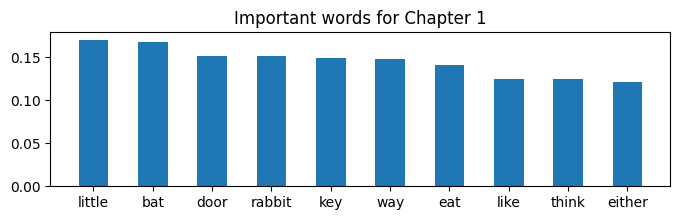

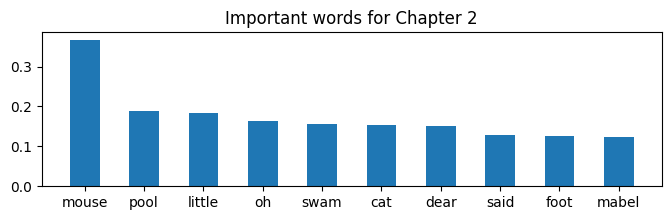

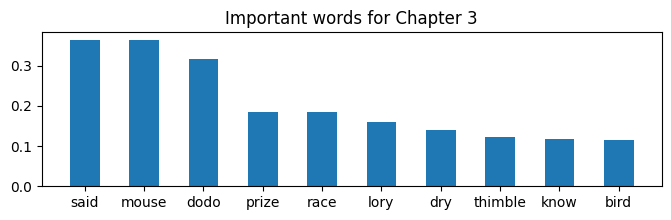

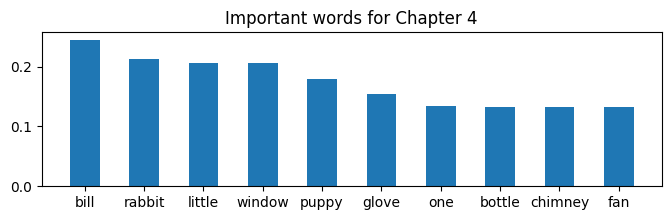

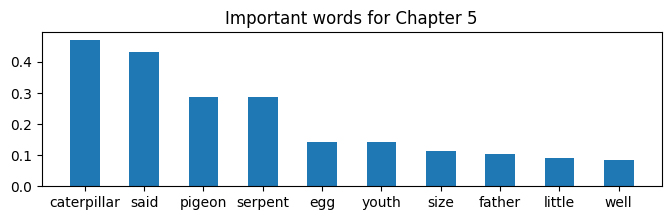

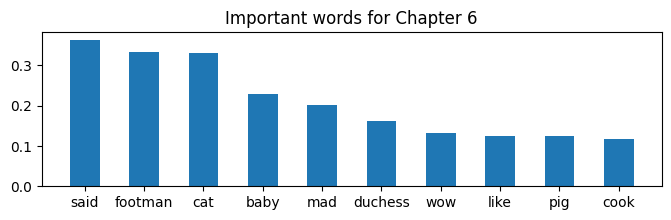

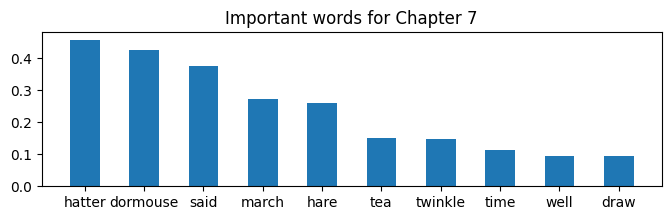

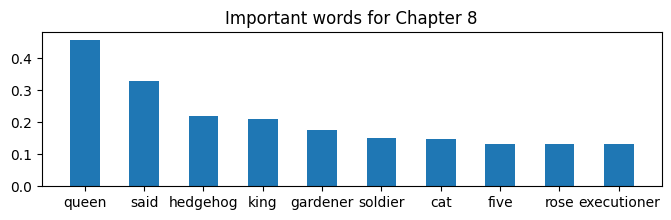

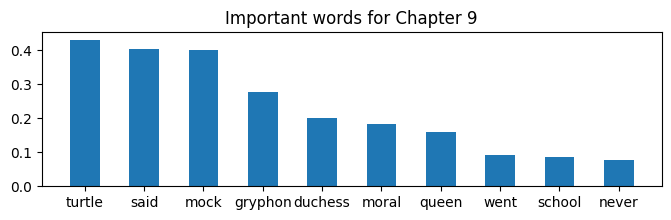

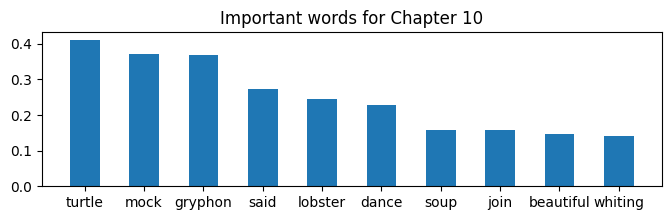

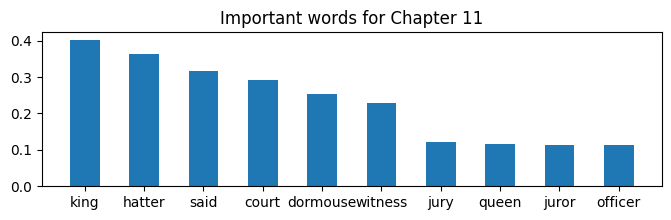

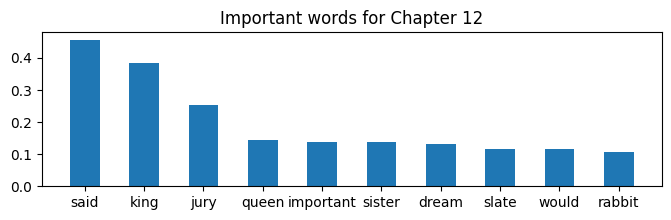

In [4]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
corpus_tf_idf = vectorizer.fit_transform(chapters)

tfidf = pd.DataFrame(corpus_tf_idf.todense())
tfidf.columns = vectorizer.get_feature_names_out()

tfidf_matrix = tfidf.T

for i in range(0, 12):
    values = tfidf_matrix[i].nlargest(n=10)
    indices = tfidf_matrix[i].nlargest(n=10).index
    plt.figure(figsize = (8,2))
    fig = plt.bar(indices, values, width=0.5)
    plt.title(f'Important words for Chapter {i+1}')

Updated chapter titles:

1. Rabbits and bats at the door
2. Pool full of mice
3. Competition with Dodo
4. Bills and rabbits, windows and puppies
5. The story of the Caterpillar
6. Footman and a Cat
7. Teatime with the hatter and a dormouse
8. Queen's orders
9. The Royals and their tales
10. Food and entertainment
11. At the court
12. King is speaking!

## 4. Find the Top 10 most used verbs in sentences with Alice. What does Alice do most often?

In [5]:
nlp = spacy.load("en_core_web_sm")

# Function to extract verbs from sentences
def get_verbs(sentence):
    sentence =re.sub(r'[^a-z]', ' ', sentence)
    sentence = nlp(sentence)
    lemmed_verbs = [token.lemma_  for token in sentence if token.pos_ == 'VERB' and token not in stop_words and token.lemma_ != "s"]

    return lemmed_verbs

sentences = sent_tokenize(text)

alice_verbs = []
for sentence in sentences:
    sentence = sentence.lower()
    if 'alice' in sentence:
        verbs = get_verbs(sentence)
        alice_verbs.extend(verbs)

# Count the occurrence of each verb
verb_counts = nltk.FreqDist(alice_verbs)

# Get the top 10 most frequent verbs
top_verbs = verb_counts.most_common(10)
print(f'verb\tcount\n')
for t in top_verbs:
  print(f'{t[0]}\t{t[1]}')


verb	count

say	296
go	93
think	89
get	63
know	57
look	56
see	53
have	50
begin	48
come	47
